# 0/1 Knapsack

> Q: Given a list of N items, and a backpack with a limited capacity, return the maximum total profit that can be contained in the backpack. The i-th item's profit is profit[i] and its weight is weight[i]. Assume you can only add each item to the bag at most once.
>
> e.g. given `profit=[4,4,7,1]` and `weight=[5,2,3,1]`, this means the `0`th item has a profit of `4` and a weight of `5`

A greedy approach selecting the highest profit at each step doesn't work well because we may quickly run into capacity limits. A better approach would be to brute-force search all possible solutions, where we start from the first item, decide whether to include `1` or exclude `0` and proceed to the next item. We can represent this using a decision tree. $C$ represents the updated remaining capacity, while the red numbers represent the profit of new item added, and the blue numbers represent the updated total profit.

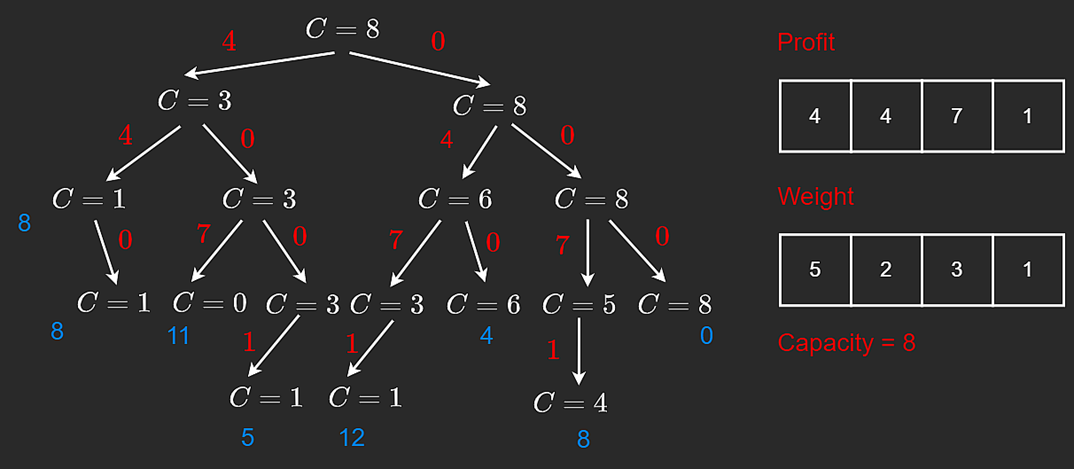



## Implementation

We go through every item in order, deciding whether to include or not. We explore every branch, and return the max of sub-branches and return the calls upwards towards the root node.

In [ ]:
# Brute force Solution
# Time: O(2^n), Space: O(n)
# Where n is the number of items.
def dfs(profit, weight, capacity):
    return dfsHelper(0, profit, weight, capacity)

#we start calculating the profits from the end of the array - in other words, from the leaf nodes up to the root of the tree!
def dfsHelper(i, profit, weight, capacity):
    #we've gone past the array, explored all items
    if i == len(profit):
        return 0

    # Skip item i
    maxProfit = dfsHelper(i + 1, profit, weight, capacity)

    # Include item i, need to test whether this is valid or not
    newCap = capacity - weight[i]

    #only include if valid
    if newCap >= 0:
        #p is including the item, and then we consider the next item
        p = profit[i] + dfsHelper(i + 1, profit, weight, newCap)
        # Compute the max
        maxProfit = max(maxProfit, p)

    return maxProfit


The time complexity of the above is $O(2^n)$, since we have a complete binary tree (include or exclude item at each step). $n$ is the number of items.

## Top-Down Memoization

With memoization, we can actually make this $O(n*c)$ where c is the capacity we've been given. We use a cache so we don't have to recalculate values, just retrieve. We can either store our values using a hashmap or a 2D grid as we've done below.

```pseudocode

def helper(current_iteration,nums_array,state,target,cache):

    if reach end of nums_array:
        if condition:
            return XXXX
        else:
            return XXXX

    if cache:
        return cache

    cache[(i,state)]=f(
        helper(i+1,nums_array,updated_state,target,cache),
        helper(i+1,nums_array,different_updated_state,target,cache)
    )

    return cache[(i,state)]
```

In [ ]:
# Memoization Solution
# Time: O(n * m), Space: O(n * m)
# Where n is the number of items & m is the capacity.
def memoization(profit, weight, capacity):
    # A 2d array, with N rows and M + 1 columns, init with -1's
    N, M = len(profit), capacity
    cache = [[-1] * (M + 1) for _ in range(N)]
    return memoHelper(0, profit, weight, capacity, cache)

def memoHelper(i, profit, weight, capacity, cache):
    #reached the end
    '''make sure to go one above, so we end at len(profit) not len(profit)-1 !'''
    if i == len(profit):
        return 0
    #havent filled this in yet
    if cache[i][capacity] != -1:
        return cache[i][capacity]

    # Skip item i, store it in the cache
    cache[i][capacity] = memoHelper(i + 1, profit, weight, capacity, cache)

    # Include item i
    #newCap is the updated capacity
    newCap = capacity - weight[i]
    if newCap >= 0:
        p = profit[i] + memoHelper(i + 1, profit, weight, newCap, cache)
        # Compute the max
        cache[i][capacity] = max(cache[i][capacity], p)

    return cache[i][capacity]


## Bottom-Up Tabulation

If you're unlucky enough, the interviewer may ask for a bottom-up approach. We will represent our solution space with `capacity+1` number of columns and `num_items` of rows. Hence our columns is indexed from `0` till `capacity`, while rows are indexed from `0` till `num_items-1`. Row `i` and column `c` represents our maximum profit considering items from `0` till `i` inclusive, while being restricted by a capacity of `c`.

`profit=[4,4,7,1]` and `weight=[5,2,3,1]`

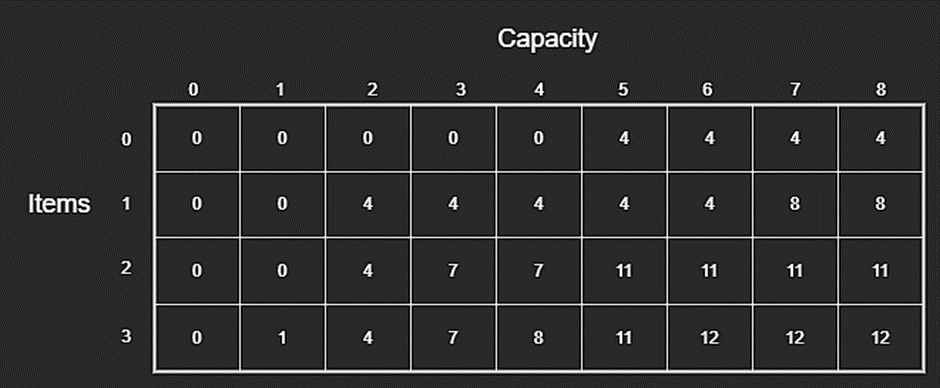

- If we're at a row and column where the weight of the item (determined by row) exceeds the capacity (determined by column), then we must skip this item. We derive the max profit by looking at one value upwards in the previous row `dp[i-1][c]`
- If we're at a row and column where the capacity can contain the new item, then we go one row up and `weight[i]` positions to the left. We basically want to know, if we were to add this item yet still adhering to the current capacity, what is the max profit. Hence we must go diagonally and look at the max profit for a smaller capacity (hence going left)

In [1]:
# Dynamic Programming Solution
# Time: O(n * m), Space: O(n * m)
# Where n is the number of items & m is the capacity.
def dp(profit, weight, capacity):
    N, M = len(profit), capacity
    #go one extra column
    dp = [[0] * (M + 1) for _ in range(N)]

    # Initialization: Fill the leftmost column and topmost row to reduce edge cases
    for i in range(N):
        dp[i][0] = 0
    for c in range(M + 1):
        if weight[0] <= c:
            dp[0][c] = profit[0]

    #start tabulation
    for i in range(1, N):
        for c in range(1, M + 1):
            #skip value just look at the top
            skip = dp[i-1][c]

            include = 0
            #if valid
            if c - weight[i] >= 0:
                #add new item's profit to old profit without item
                #this part is very tricky!!
                include = profit[i] + dp[i-1][c - weight[i]]
            dp[i][c] = max(include, skip)
    #return bottom right item
    return dp[N-1][M]


Complexity of bottom-up approach is also $O(n*c)$ same as top-down approach

In [3]:
def count(arr):
    '''return number of 0,1'''
    zeros,ones=0,0
    for c in arr:
        if c=='0':
            zeros+=1
        else:
            ones+=1
    return(zeros,ones)

print(count('0101011'))

(3, 4)


---

## Problem: Ones and Zeros

You are given an array of binary strings `strs` and two integers `m` and `n`.

Return the size of the largest subset of `strs` such that there are at most `m` `0`'s and `n` `1`'s in the subset.

A set x is a subset of a set y if all elements of x are also elements of y.

```
Input: strs = ["10","0001","111001","1","0"], m = 5, n = 3
Output: 4
Explanation: The largest subset with at most 5 0's and 3 1's is {"10", "0001", "1", "0"}, so the answer is 4.
Other valid but smaller subsets include {"0001", "1"} and {"10", "1", "0"}.
{"111001"} is an invalid subset because it contains 4 1's, greater than the maximum of 3.
```

The below initial approach illustrates a core mistake in returning the total length obtained so far, rather than returning the lengths from the end of the array and summing up the recursive calls. Only the latter allows proper memoization.

In [6]:
from typing import List
'''
my code, which is wrong!
this is because caching (i,m_cur,n_cur) in fact stores the solution to multiple branches with the same subproblem
by returning the length of the selected array, instead of the counts from leaf nodes, our caching is now the wrong caching!
this is strong the length of the selected array for a specific case (i,m_cur,n_cur) which is NOT THE SAME RESULT as another same (i,m_cur,n_cur)
'''
class Solution:
    def findMaxForm(self, strs: List[str], m: int, n: int) -> int:
        return self.helper(0,[],strs,0,0,m,n,{})

    def helper(self,i,select,strs,m_cur,n_cur,m,n,cache):
        if i==len(strs):
            print('returning selection',select)
            return len(select)
        
        if (i,m_cur,n_cur) in cache:
            return cache[(i,m_cur,n_cur)]
        print('considering', strs[i],'current selection',select)

        #check if valid or not
        amt=self.count(strs[i])
        if m_cur+amt[0]>m or n_cur+amt[1]>n:
            #no more recursive calls, must terminate this branch now
            include=-1
        else:
            include=self.helper(i+1,
                select+[strs[i]],
                strs,
                m_cur+amt[0],
                n_cur+amt[1],
                m,
                n,
                cache)

        exclude=self.helper(i+1,
                select,
                strs,
                m_cur,
                n_cur,
                m,
                n,
                cache)
        #
        cache[(i,m_cur,n_cur)]=max(include,exclude)

        return cache[(i,m_cur,n_cur)]

    def count(self,arr):
        '''return number of 0,1'''
        zeros,ones=0,0
        for c in arr:
            if c=='0':
                zeros+=1
            else:
                ones+=1
        return(zeros,ones)

note my updated solution is actually correct and decently efficient

Runtime ~ 2000ms

In [7]:
#my updated sol
class Solution:
    def findMaxForm(self, strs: List[str], m: int, n: int) -> int:
        
        def helper(i,m_cur,n_cur,m,n,cache):
            if i==len(strs):
                #starting counting from bottom up, so 0 here
                return 0
            
            if (i,m_cur,n_cur) in cache:
                return cache[(i,m_cur,n_cur)]

            #get updated counts and check if valid
            amt=strs[i].count("0"), strs[i].count("1")

            exclude=helper(i+1,
                    m_cur,
                    n_cur,
                    m,
                    n,
                    cache)

            if m_cur+amt[0]>m or n_cur+amt[1]>n:
                #not valid
                #we definitely exclude
                cache[(i,m_cur,n_cur)]=exclude
            else:
                include=1+helper(i+1,
                    m_cur+amt[0],
                    n_cur+amt[1],
                    m,
                    n,
                    cache)
                #consider both include exclude
                cache[(i,m_cur,n_cur)]=max(include,exclude)

            return cache[(i,m_cur,n_cur)]

        return helper(0,0,0,m,n,{})
        

This top-down approach uses the built-in python caching decorator `cache` which automatically does caching for you. Very neat, please remember this! Default size of cache is 128, though you can use `@lru_cache(maxsize=256)` to increase the maxsize. This is very simple and clean!

Runtime ~ 1200ms

In [8]:
from functools import cache,lru_cache
class Solution:
    def findMaxForm(self, strs: List[str], m: int, n: int) -> int:
        counter=[[s.count("0"), s.count("1")] for s in strs]
        
        @cache
        def dp(i,j,idx):
            #exceeded capacity
            if i<0 or j<0:
                return -1
            
            if idx==len(strs):
                return 0
            #first is to exclude it, second is to include it while decreasing count
            return max(dp(i,j,idx+1), 1 + dp(i-counter[idx][0], j-counter[idx][1], idx+1))
        return dp(m,n,0)

neetnode's bottom-up tabulation approach. I'm confused. Not sure why the runtime is so bad.

Runtime ~2800ms

In [9]:
from collections import defaultdict
class Solution:
    def findMaxForm(self, strs: List[str], M: int, N: int) -> int:
        # Dynamic Programming
        dp = defaultdict(int)

        for s in strs:
            mCnt, nCnt = s.count("0"), s.count("1")
            for m in range(M, mCnt - 1, -1):
                for n in range(N, nCnt - 1, -1):
                    dp[(m, n)] = max(
                        1 + dp[(m - mCnt, n - nCnt)],
                        dp[(m, n)])
        return dp[(M, N)]